In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,9

# partie 1

In [60]:
df = pd.read_csv('MROZ.raw', sep='\s+', header= None , na_values='.')
df = df.rename(columns={0:'inlf',
                      1:'hours',
                     2:'kidslt6',
                     3:'kidsge6',
                     4:'age',
                     5:'educ',
                     6:'wage',
                     7:'repwage',
                     8:'hushrs',
                     9:'husage',
                     10:'huseduc',
                     11:'huswage',
                     12:'faminc',
                     13:'mtr',
                     14:'motheduc',
                     15:'fatheduc',
                     16:'unem',
                     17:'city',
                     18:'exper',
                     19:'nwifeinc',
                     20:'lwage',
                     21:'expersq'})
df.head(10)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.556480,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.120260,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900040,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,0.754336,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


In [61]:
df[['wage', 'lwage', 'huswage']] = df[['wage', 'lwage', 'huswage']].apply(pd.to_numeric)

In [62]:
df = df[df.wage>0]

In [63]:
df[['age','wage','educ']].describe()

,age,wage,educ
count,428.000000,428.000000,428.000000
mean,41.971963,4.177682,12.658879
std,7.721084,3.310282,2.285376
min,30.000000,0.128200,5.000000
25%,35.000000,2.262600,12.000000
50%,42.000000,3.481900,12.000000
75%,47.250000,4.970750,14.000000
max,60.000000,25.000000,17.000000


In [64]:
df[df.huswage>df.huswage.median()][['age','wage','educ']].describe()

,age,wage,educ
count,214.000000,214.000000,214.000000
mean,42.275701,4.896822,13.242991
std,7.388843,4.041606,2.359045
min,30.000000,0.161600,5.000000
25%,36.000000,2.513850,12.000000
50%,43.000000,3.846400,12.000000
75%,48.000000,5.854125,16.000000
max,59.000000,25.000000,17.000000


In [65]:
df[df.huswage<df.huswage.median()][['age','wage','educ']].describe()

,age,wage,educ
count,214.000000,214.000000,214.000000
mean,41.668224,3.458541,12.074766
std,8.045482,2.143274,2.054200
min,30.000000,0.128200,6.000000
25%,35.000000,2.117275,12.000000
50%,41.000000,2.971800,12.000000
75%,47.000000,4.393800,12.000000
max,60.000000,18.267000,17.000000


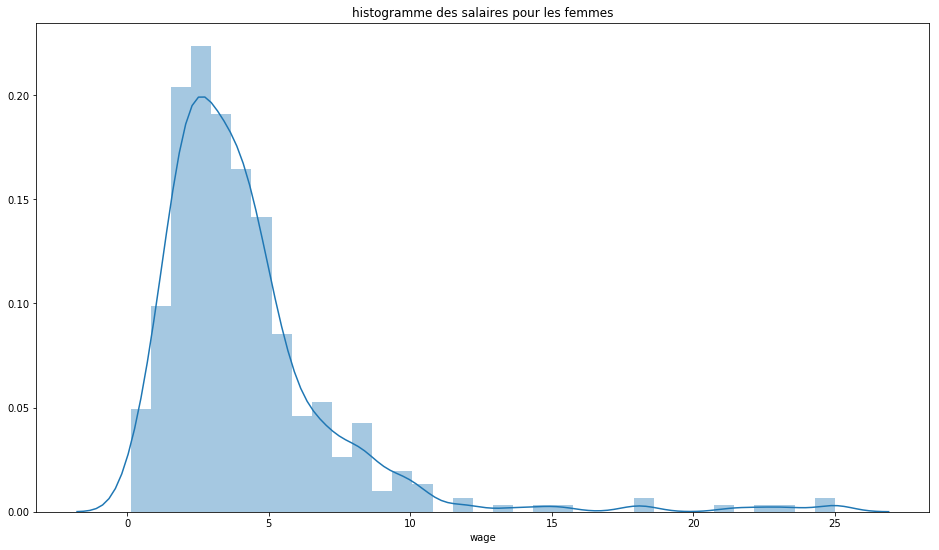

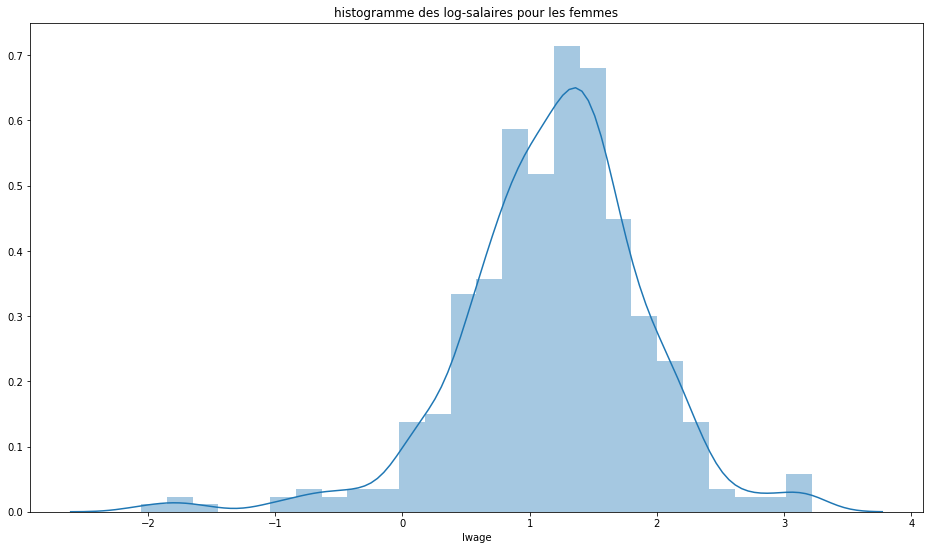

In [66]:
sns.distplot(df["wage"])
plt.title("histogramme des salaires pour les femmes")
plt.show()
sns.distplot(df["lwage"])
plt.title("histogramme des log-salaires pour les femmes")
plt.show()

In [37]:
df['motheduc'].corr(df['fatheduc'])

0.573071742520837

<Figure size 1152x1152 with 0 Axes>

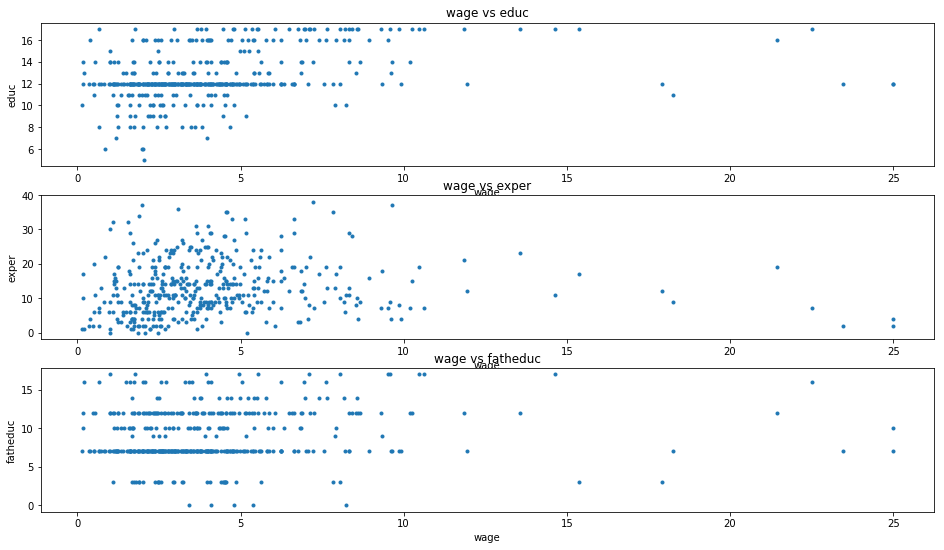

In [74]:
plt.figure(figsize=(16,16))
x, axarr = plt.subplots(3, 1)

axarr[0].plot(df["wage"], df["educ"], '.')
axarr[0].set_title('wage vs educ')
axarr[0].set_xlabel("wage")
axarr[0].set_ylabel("educ")

axarr[1].plot(df["wage"], df["exper"], '.')
axarr[1].set_title('wage vs exper')
axarr[1].set_xlabel("wage")
axarr[1].set_ylabel("exper")

axarr[2].plot(df["wage"], df["fatheduc"], '.')
axarr[2].set_title('wage vs fatheduc')
axarr[2].set_xlabel("wage")
axarr[2].set_ylabel("fatheduc")


plt.show()

In [72]:
df['const'] = 1

In [91]:
X = df[['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']]
y = df['wage'].values

In [94]:
C = np.linalg.inv(X.T @ X) @  X.T @ y
for a,b in zip(X.columns,C):
    print(a,b)

const -2.403453991547149
city 0.36975202950522656
educ 0.46004770125863026
exper 0.023819947951075452
nwifeinc 0.015244793576326314
kidslt6 0.0361731913892786
kidsge6 -0.06189090968571385


In [95]:
ypred = X @ C

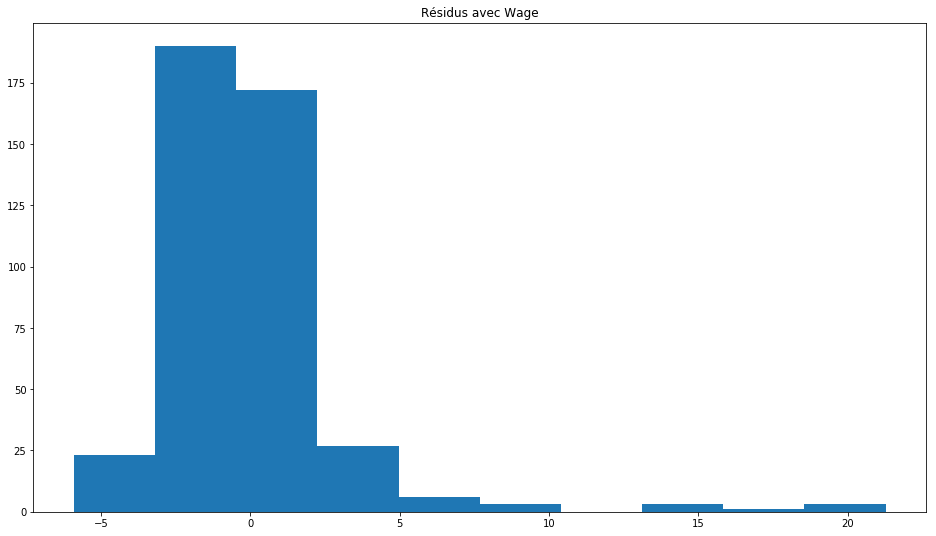

In [97]:
plt.hist(y-ypred)
plt.title('Résidus avec Wage')
plt.show()

# Q8

In [98]:
y2 = df['lwage'].values
C2 = np.linalg.inv(X.T @ X) @  X.T @ y2
for a,b in zip(X.columns,C2):
    print(a,b)

const -0.39897522667500984
city 0.03526789293232656
educ 0.10224754784019026
exper 0.015487872095843397
nwifeinc 0.00488269568156376
kidslt6 -0.04530287038168891
kidsge6 -0.011703506704368838


In [101]:
ypred2 = X @ C2

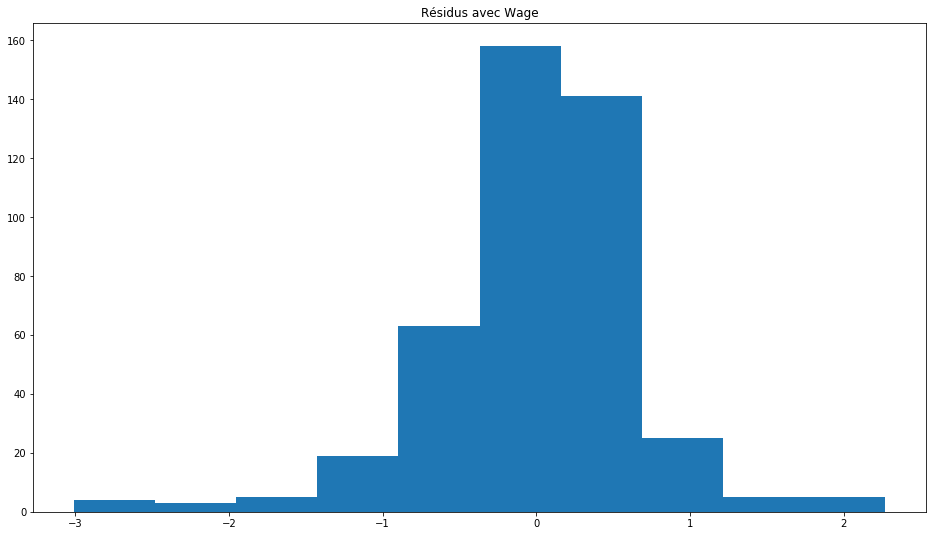

In [102]:
plt.hist(y2-ypred2)
plt.title('Résidus avec Wage')
plt.show()

# Q9

In [104]:
from scipy import stats

In [113]:
X.shape, y2.reshape(-1,1).shape

((428, 7), (428, 1))

In [111]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y2.reshape(-1,1))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# partie2

In [3]:
df = pd.read_excel('./quarterly.xls')

In [6]:
df.dtypes

DATE         object
FFR         float64
Tbill       float64
Tb1yr       float64
r5          float64
r10         float64
PPINSA      float64
Finished    float64
CPI         float64
CPICORE     float64
M1NSA       float64
M2SA        float64
M2NSA       float64
Unemp       float64
IndProd     float64
RGDP        float64
Potent      float64
Deflator    float64
Curr        float64
dtype: object

In [49]:
df['inf'] = (df.CPI-df.CPI[0])/df.CPI[0]

In [51]:
df['inf'] = df['CPI'].pct_change()

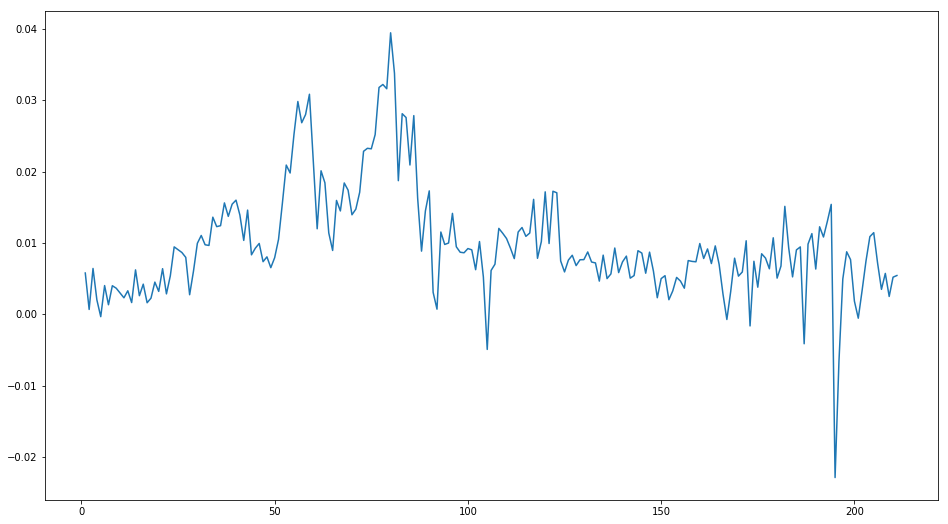

In [54]:
df.inf.plot()

In [12]:
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,...,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,inf,inf2
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,...,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,0.000000,NaN
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,...,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,0.005782,0.005782
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,...,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,0.006463,0.000676
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,...,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,0.012925,0.006421
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,...,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,0.014966,0.002015


In [15]:
df.shape

(212, 21)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [55]:
from statsmodels.tsa.stattools import acf, pacf

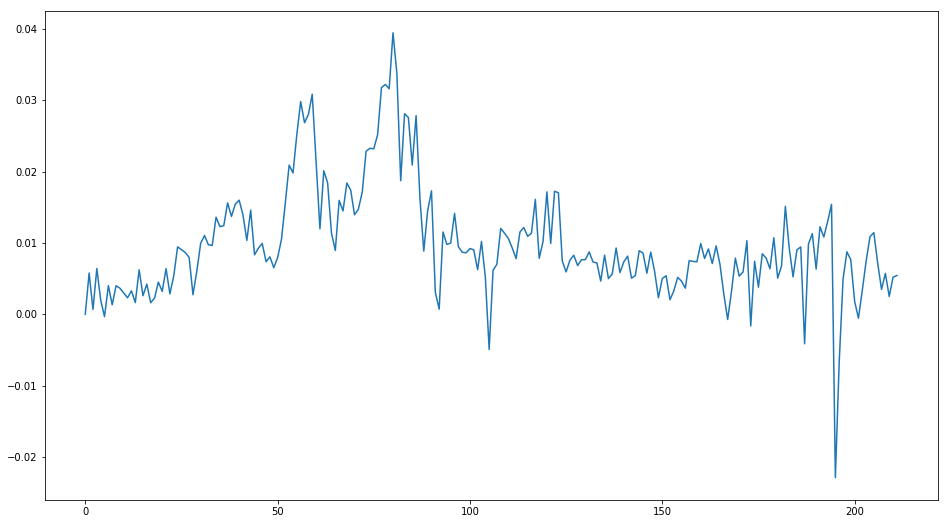

In [70]:
df.inf.plot()

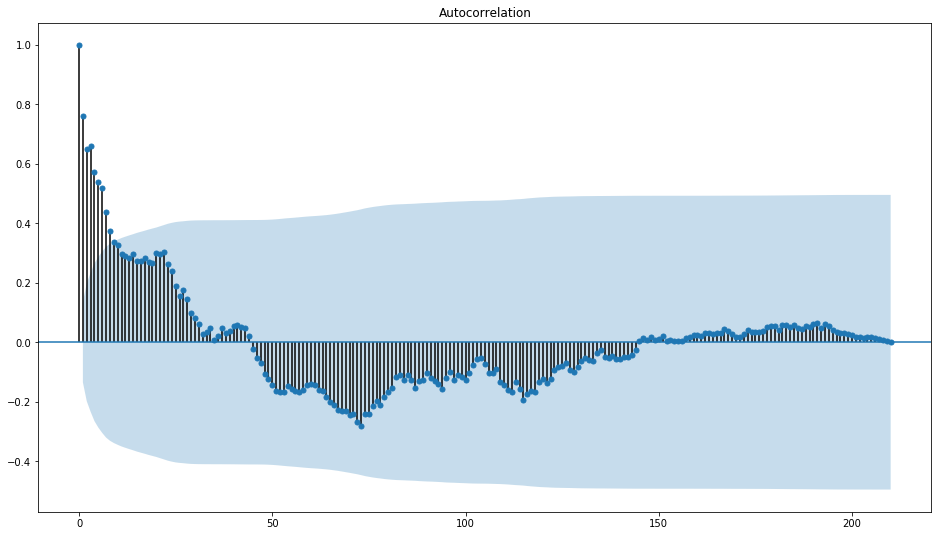

In [29]:
plot_acf(df.inf[1:])
plt.show()

In [ ]:
po

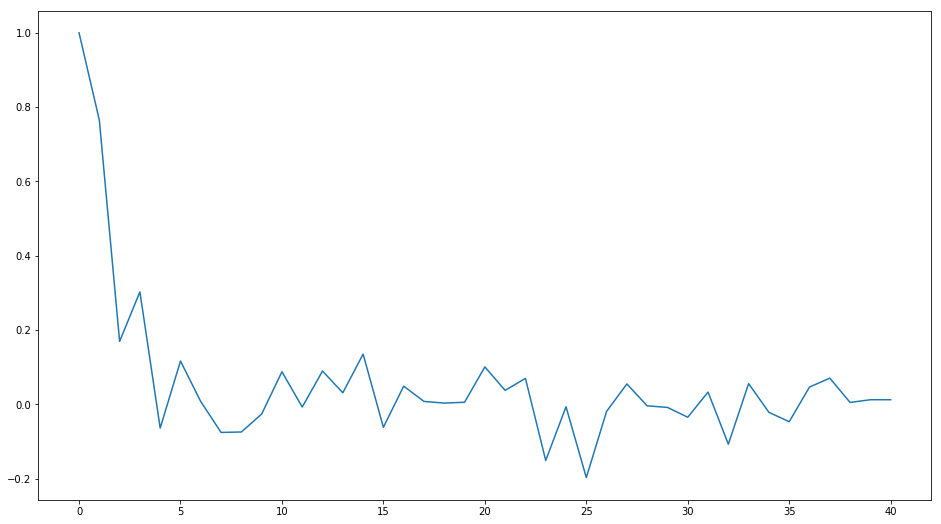

In [59]:
plt.plot(pacf(df.inf[1:]))

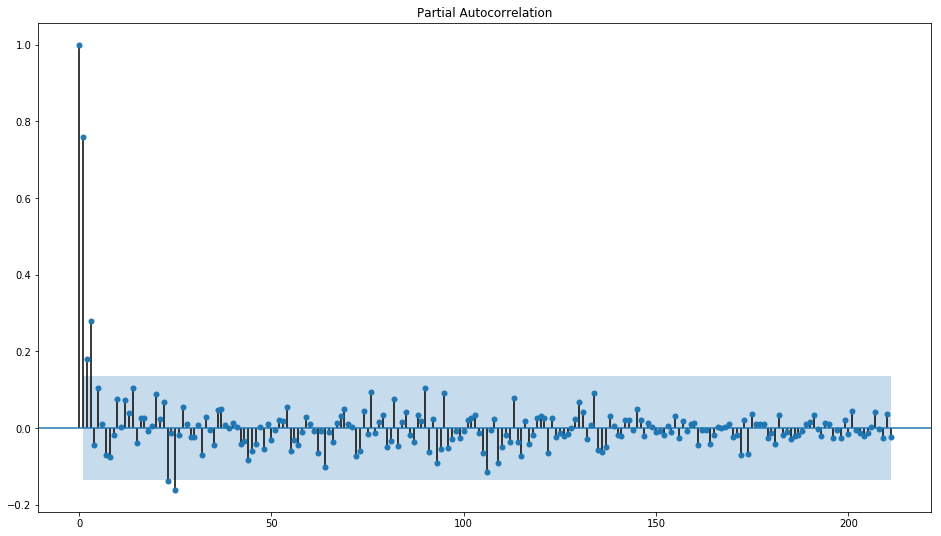

In [81]:
plot_pacf(df.inf, method='ywm')
plt.show()

In [37]:
df.inf[1:].describe()

count    211.000000
mean       0.009853
std        0.007745
min       -0.022891
25%        0.005420
50%        0.008577
75%        0.012213
max        0.039458
Name: inf, dtype: float64

In [65]:
df.inf = df.inf.fillna(0)

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
t, p_value, lags, obs, crit_val, regression = adfuller(df.inf)

In [74]:
t, p_value, lags, obs, crit_val, regression

(-3.012202584730722,
 0.03377044004202326,
 2,
 209,
 {'1%': -3.4620315036789666,
  '5%': -2.8754705024827127,
  '10%': -2.5741950726860647},
 -1528.05981366386)

In [77]:
from statsmodels.tsa.ar_model import AR

In [78]:
ar_mod = AR(df.inf)

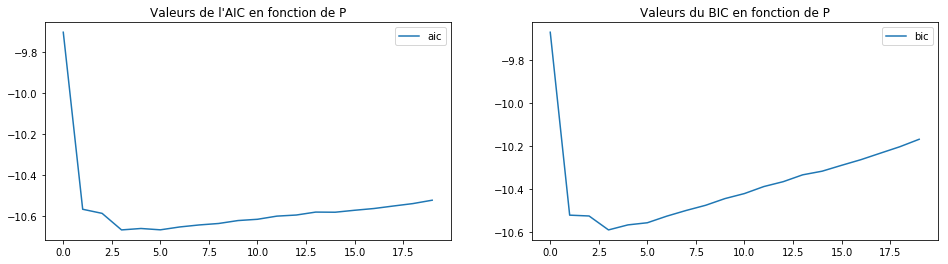

minimum p for aic :  3
minimum p for bic :  3
selected p        :  3  with  bic


In [79]:

lags = 20
bic_list = []
aic_list = []

for i in range(0, lags):
    res = ar_mod.fit(i)
    aic_list.append(res.aic)
    bic_list.append(res.bic)

    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
pd.DataFrame(aic_list, columns=['aic']).plot(ax=ax1)
legend = ax1.legend(loc = 'best')
ax1.set_title('Valeurs de l\'AIC en fonction de P')
pd.DataFrame(bic_list, columns=['bic']).plot(ax=ax2)
legend = ax2.legend(loc = 'best')
ax2.set_title('Valeurs du BIC en fonction de P')

plt.show()
    
min_p_aic = aic_list.index(min(aic_list))
min_p_bic = bic_list.index(min(bic_list))
p =  min([min_p_aic, min_p_bic])
print('minimum p for aic : ', str(min_p_aic))
print('minimum p for bic : ', str(min_p_bic))
print('selected p        : ', str(p), ' with ', 'aic' if min_p_aic < min_p_bic else 'bic')

In [80]:
fitted_m = ar_mod.fit(p)
print("Paramètres du modèle :\n", fitted_m.params)

Paramètres du modèle :
 const     0.001427
L1.inf    0.578205
L2.inf   -0.012483
L3.inf    0.292626
dtype: float64


In [103]:
x = pd.concat([df.inf.shift(1),df.inf.shift(2),df.inf.shift(3)], axis=1)

In [104]:
x.insert(0, 'const', 1)

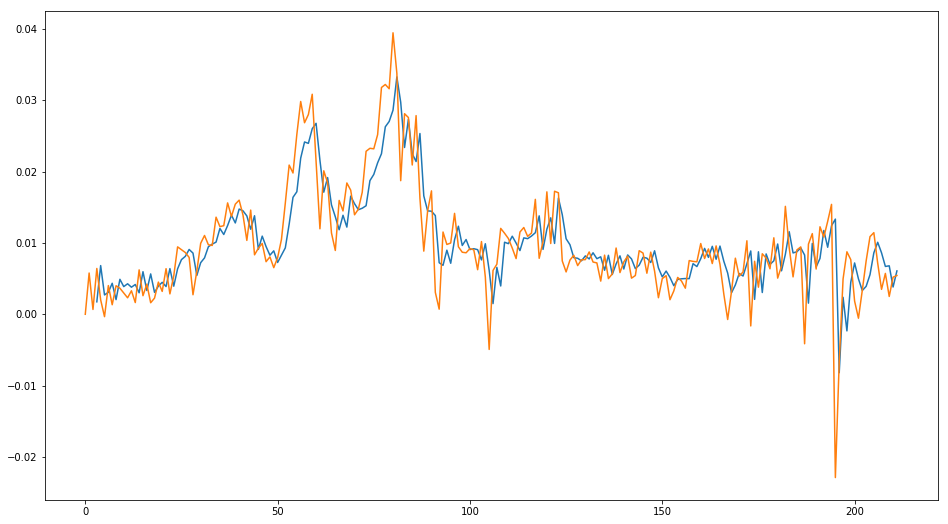

In [116]:
plt.plot(x.values@np.array(fitted_m.params))
plt.plot(df.inf)

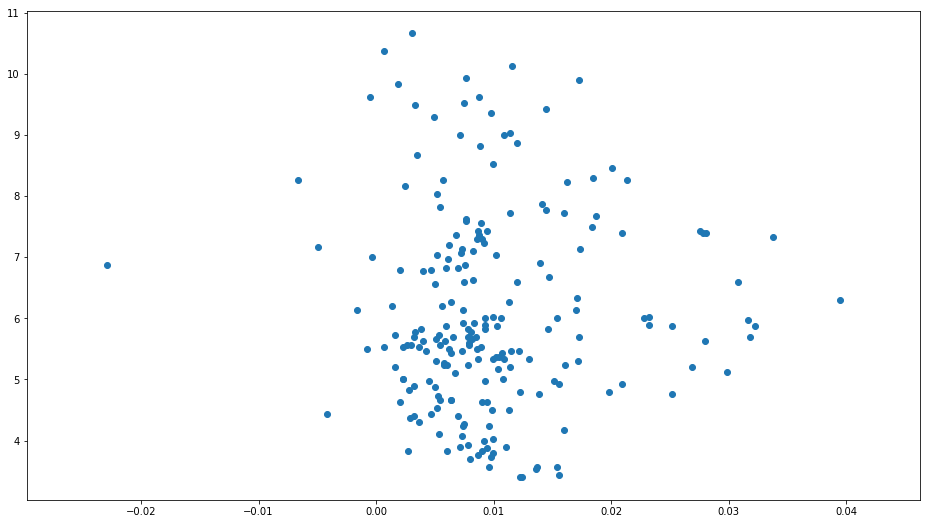

In [119]:
plt.scatter(df['inf'].iloc[1:],df['Unemp'].iloc[1:])
plt.show()

In [120]:
import statsmodels.api as sm

In [121]:
X=df.inf
Y=df.Unemp
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    6.059254
inf      2.317627
dtype: float64

In [123]:
e = Y-X@results.params

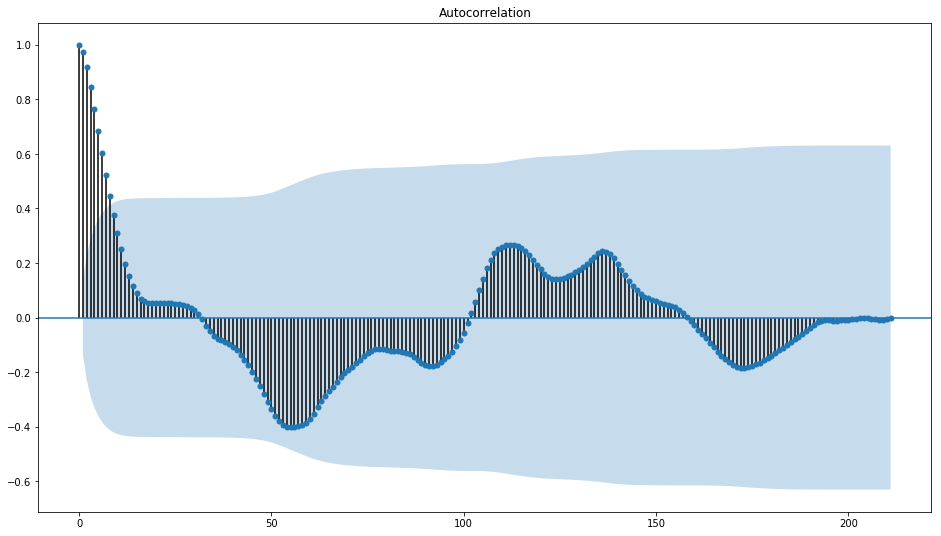

In [125]:
plot_acf(e)
plt.show()

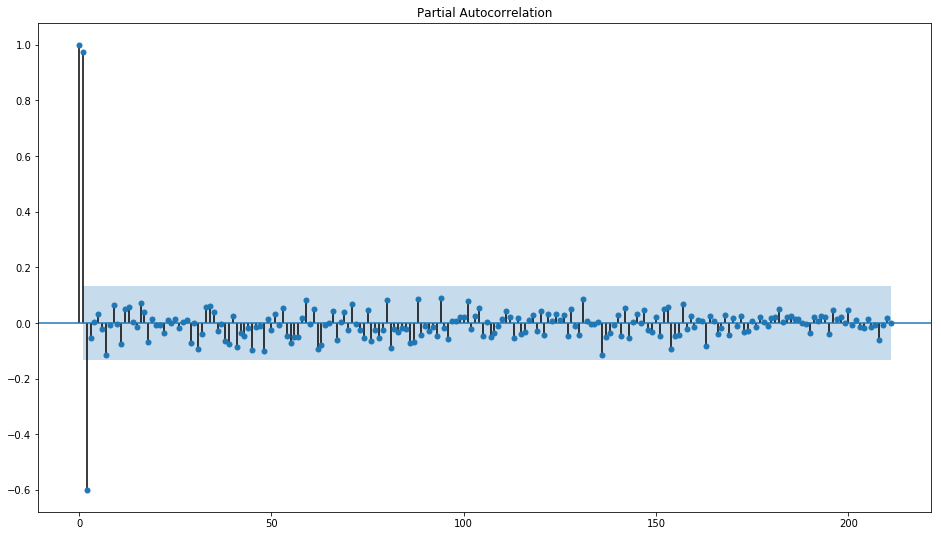

In [127]:
plot_pacf(e, method='ywm')
plt.show()

In [128]:
results.tvalues

const    33.773605
inf       0.161370
dtype: float64

In [129]:
df.shape

(212, 21)